<a href="https://colab.research.google.com/github/daiki-skm/oreilly-web-optimization/blob/main/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -U pymc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.2/872.2 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529963 sha256=026fff0e3c89ca8d10d0ba2d1990aa993e67879e2ea14f5262efebf40a2ec2ac
  Stored in directory: /root/.cache/pip/wheels/0e/41/d2/82c7b771236f987def7fe2e51855cce22b270327f3fedec57c
Successfully built theano-pymc


In [4]:
import numpy as np
from matplotlib import pyplot as plt
import pymc3 as pm

N = 40
a = 2
with pm.Model() as Model:
  theta = pm.Uniform('theta', lower=0, upper=1)
  obs = pm.Binomial('a', p=theta, n=N, observed=a)
  trace = pm.sample(5000, chains=2)

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


<ipython-input-6-d0c151c008fe>:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)


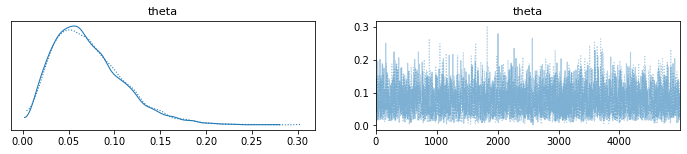

In [6]:
with Model:
  pm.traceplot(trace)

In [7]:
with Model:
  print(pm.summary(trace, hdi_prob=0.95))

        mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
theta  0.072  0.038     0.008      0.145      0.001      0.0    4352.0   

       ess_tail  r_hat  
theta    5168.0    1.0  


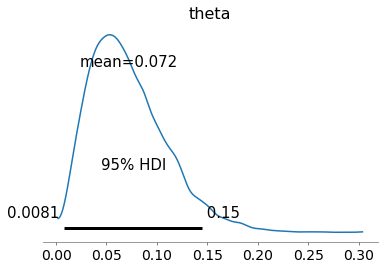

In [8]:
with Model:
  pm.plot_posterior(trace, hdi_prob=0.95)

In [9]:
print((trace['theta']-0.01>0).mean())

0.9931


In [10]:
with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=1, shape=2)
  obs = pm.Binomial('obs', p=theta, n=[40,50], observed=[2,4])
  trace = pm.sample(5000, chains=2)

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


<ipython-input-11-833197006f8c>:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace, ['theta'], compact=True)


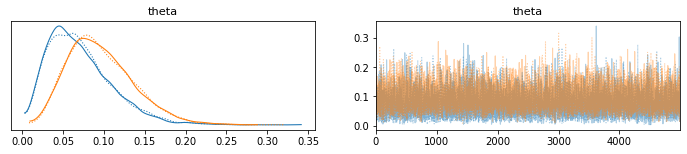

In [11]:
with model:
  pm.traceplot(trace, ['theta'], compact=True)

In [12]:
print((trace['theta'][:,1] - trace['theta'][:,0] > 0).mean())

0.6818


/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


0.9989


<ipython-input-13-64807c748013>:6: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace, ['theta'], compact=True)


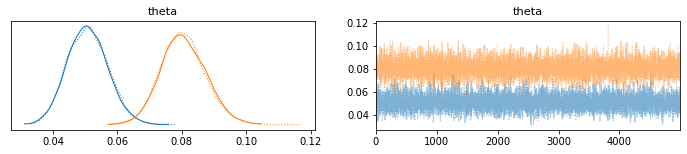

In [13]:
with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=1, shape=2)
  obs = pm.Binomial('obs', p=theta, n=[1280,1600], observed=[64,128])
  trace = pm.sample(5000, chains=2)
  print((trace['theta'][:,1] - trace['theta'][:,0] > 0).mean())
  pm.traceplot(trace, ['theta'], compact=True)

In [14]:
n_a = [20, 10, 36, 91, 170]
data = [0 for _ in range(n_a[0])]
data += [1 for _ in range(n_a[1])]
data += [2 for _ in range(n_a[2])]
data += [3 for _ in range(n_a[3])]
data += [4 for _ in range(n_a[4])]

with pm.Model() as model_a:
  theta = pm.Dirichlet('theta',a=np.array([1,1,1,1,1]))
  obs = pm.Categorical('obs',p=theta,observed=data)
  trace_a = pm.sample(5000,chains=2)

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


<ipython-input-15-d32f6a6384cf>:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_a)


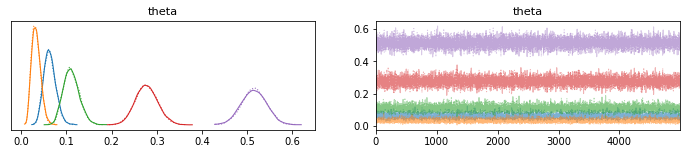

In [15]:
with model_a:
  pm.traceplot(trace_a)

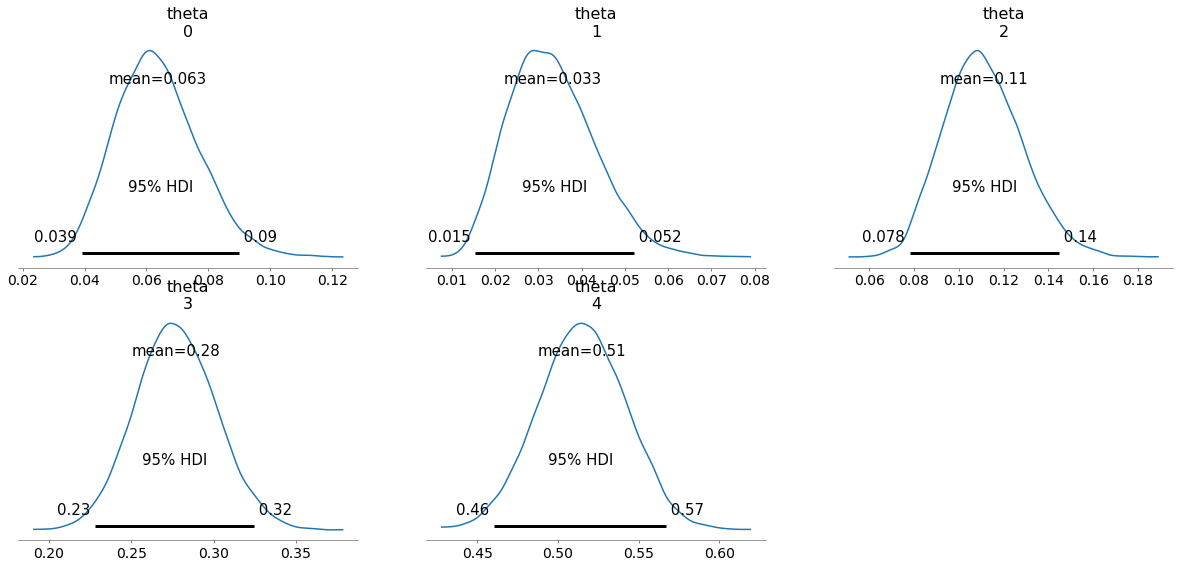

In [16]:
with model_a:
  pm.plot_posterior(trace_a,hdi_prob=0.95)

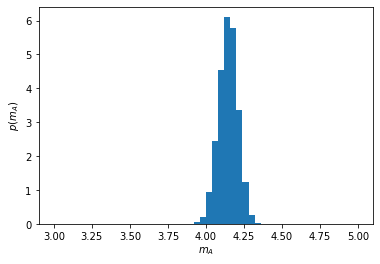

In [18]:
weights = np.array([1,2,3,4,5])
m_a = np.matmul(trace_a['theta'], weights)
plt.hist(m_a, range=(3,5), bins=50, density=True)
plt.xlabel(r'$m_A$')
plt.ylabel(r'$p(m_A)$')
plt.show()

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


<ipython-input-19-30847a07dc8f>:6: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_b)


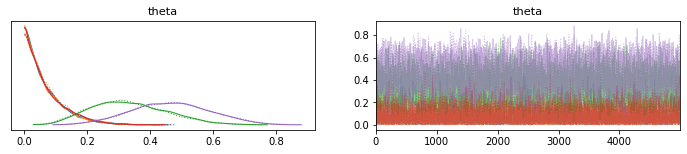

In [19]:
n_b = np.array([0,0,4,0,6])
with pm.Model() as model_b:
  theta = pm.Dirichlet('theta',a=np.array([1,1,1,1,1]))
  obs = pm.Multinomial('obs',p=theta,n=n_b.sum(),observed=n_b)
  trace_b = pm.sample(5000,chains=2)
  pm.traceplot(trace_b)

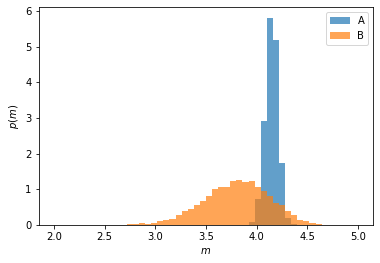

In [20]:
m_b = np.matmul(trace_b['theta'], weights)
plt.hist(m_a, range=(2,5), bins=50, density=True, label='A', alpha=0.7)
plt.hist(m_b, range=(2,5), bins=50, density=True, label='B', alpha=0.7)
plt.xlabel(r'$m$')
plt.ylabel(r'$p(m)$')
plt.legend()
plt.show()

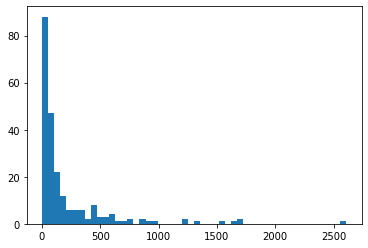

In [21]:
import urllib
url = 'https://www.oreilly.co.jp/pub/9784873119168/data/time-on-page.csv'
response = urllib.request.urlopen(url)
data = [int(row.strip()) for row in response.readlines()]
plt.hist(data,bins=50)
plt.show()

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


<ipython-input-22-11b6bd20320a>:5: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)


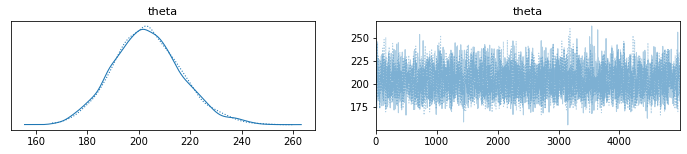

In [22]:
with pm.Model() as model:
  theta = pm.Uniform('theta',lower=0,upper=3000)
  obs = pm.Exponential('obs',lam=1/theta,observed=data)
  trace = pm.sample(5000,chains=2)
  pm.traceplot(trace)

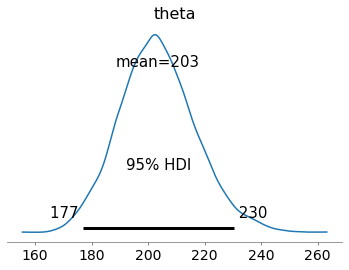

In [23]:
with model:
  pm.plot_posterior(trace,hdi_prob=0.95)